# Function for plotting outputs of 6D table

In [1]:
#first import libraries ,seaborn and sys could be removed . The other ones cannot be removed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
import sys
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#Libraries for reading csv files 
import os #library imported in order to read file in a specific location/folder
from csv import reader         # for reading csv files
from csv import writer         # for writing csv files
from tensorflow.keras.models import load_model

In [3]:
# function created in order to plot case 1: no fluctuations in mixture fraction and progress variable, and no dilution and adiabatic case
# output vs scaled progress variable for different values of mixture fraction from lean to rich mixtures
# z_mean=array of different values of mixture fraction, output= dependent variable , for instance 'H2O', unit=unit of measurement for instance "[kg]"
# h=step progress variable, for instance h=0.01 implies that values of the scaled progress variable from 0,0.01,0.02,....,0.99,1 will be plotted
# case= lookup table dimensionality, for instance "6D_hydrogen"
# example: plot_case_1([0.2,0.3,0.5,0.7,0.8,0.9],0.01,'SourcePV','[-]','6D')
# table: '6D','4D_hydrogen','4D_ethanol','5D'
# z_mean=[0.2,0.3,0.5,0.7,0.8,0.9] by default
def plot_case_1(z_mean,h,output,table):
    output=str(output)
    c_mean=np.linspace(0,1,int(1/h)+1) # create arrays of scaled progress variable
    output=str(output)
    # search minimum and maximum value of the output stored in file 'Information_ANN_Architectures_'+case+'.csv'
    with open('Information_ANN_Architectures_'+table+'.csv', 'r', newline='\n') as read_obj:
        lines=reader(read_obj)
        for line in lines:
            if (line[0]==output):
                a=float(line[1]) # minimum value
                b=float(line[2]) # maximum value
    # load ANN model corresponding to output that will be plotted
    model=load_model('best_model_'+output+'_'+table+'.h5')# for instance 'best_model_'+output+'6D'+'.h5'
    # predictions using the ANN model the output for different values of scaled progress variable and mixture fraction, considering no fluctuations
    for z_m in z_mean:
        z=[]  #create list for prediction values
        for i in range(0,len(c_mean)):
            z1=model.predict(np.array([0,0,z_m,c_mean[i],0,0]).reshape(1,-1))[0][0]  #ANN predicting values
            z.append((b-a)*z1+a)  # rescaled the ANN values, ANN predicts values between 0 to 1, they need to be rescale using min and max values
        # search values stored in lookup tables
        PV=[] # empty array to store value that will be searched on the lookup table
        c=0.02*np.linspace(0,50,51)   # 51 values corresponding to the scaled progress variable discretization stored in lookup table
        # uploading csv files containing dependend variables and the csv file which contains the output variable that will be plotted
        x1=pd.read_csv('Data/tables_'+table+'/inputs csv/inputs.csv',header=None).values # inputs file
        y1=pd.read_csv('Data/tables_'+table+'/outputs csv/'+output+'_table.csv',header=None).values # outputs file
        j=0
        # loop to search output values stored in the lookup table and store them in the array PV
        for i in range(0,x1.shape[0]):
            if np.abs(x1[i][0]-0)<=0.005:
                if np.abs(x1[i][1]-0)<=0.005:
                    if np.abs(x1[i][2]-z_m)<=0.005:
                        if np.abs(x1[i][3]-c[j])<=0.005:
                            if np.abs(x1[i][4]-0)<=0.005:
                                if np.abs(x1[i][5]-0)<=0.005:
                                    PV.append(y1[i][0])
                                    j=j+1
                                    j=min(j,50)
        #plotting results
        z=np.array(z)# converting list to an array
        #print(z) #check z converted to a array (optional)
        z=z.reshape(len(c_mean),1) #converting to a column array
        #print(z) #check(optional)
        plt.plot(c, PV, 'r.', markersize=10, label='table') # plotting values stored in lookup table
        plt.plot(c_mean, z,'b-',label='predictions')  #plotting predictions
        plt.title('Results ANN'+' '+output+' case z='+str(z_m)) #defining titles
        plt.xlabel('Progress variable[-]')             #defining x-axis scaled progress variable
        plt.ylabel(output)       #y-axis output
        plt.legend(loc='upper left')   #adding a legend
        plt.show()                      #show plot

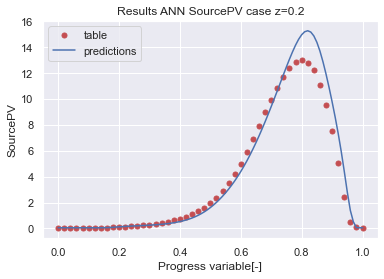

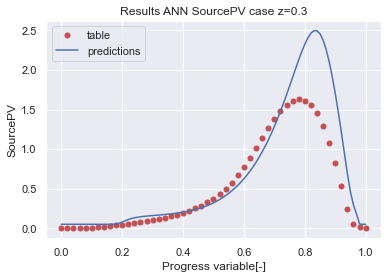

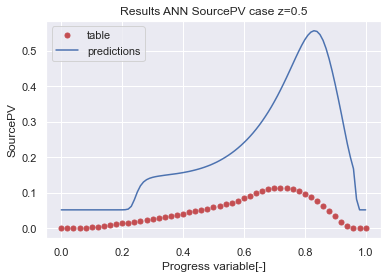

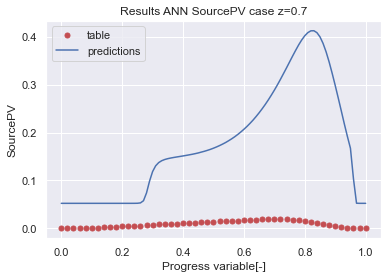

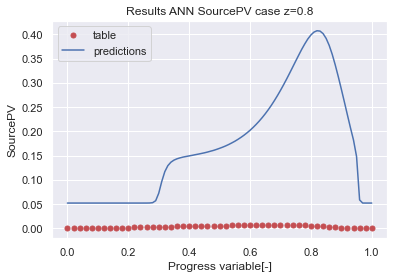

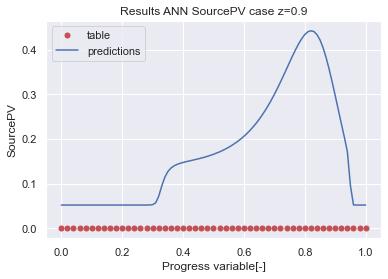

In [6]:
z_mean=[0.2,0.3,0.5,0.7,0.8,0.9]
h=0.01
plot_case_1(z_mean,h,'SourcePV','6D')

In [7]:
# function created in order to plot case 2: fluctuations in mixture fraction at stoichiometric mixtures, without dilution and adiabatic flamelets
# output vs variance of mixture fraction for different values of scaled progress variable for stocihiometric mixtures
# c_2= scaled progress variable, different values of the scaled progress variable. Typically high values of the scaled progress value
# z_var=array of different values of variance of mixture fraction, output= dependent variable , for instance 'alpha', unit=unit of measurement for instance "[kg]"
# h=step of variance of mixture fraction, for instance h=0.01 implies that values of the vairance of mixture fraction from 0,0.01,0.02,....,0.99,1 will be plotted
# case= lookup table dimensionality, for instance "6D"
# example: plot_case_2([0.8,0.85,0.9,0.95],0.01,'SourcePV','[-]','6D')
def plot_case_2(c_2,h,output,table):
    z_sto=0.04 # stoichiometric mixture
    z_var=np.linspace(0,1,int(1/h)+1) # array with different values of the variance of the mixture fraction
    output=str(output) # double check that output will be a string
    # search minimum and maximum value of the output stored in file 'Information_ANN_Architectures_'+case+'.csv'
    with open('Information_ANN_Architectures_'+table+'.csv', 'r', newline='\n') as read_obj:
        lines=reader(read_obj)
        for line in lines:
            if (line[0]==output):
                a=float(line[1]) # minimum value
                b=float(line[2]) # maximum value
    # load ANN model corresponding to output that will be plotted
    model=load_model('best_model_'+output+'_'+table+'.h5')
    # predictions using the ANN model the output for different values of variance of the mixture fraction, considering no fluctuations in scaled progress variable
    for c in c_2:
        z=[]  #create list for prediction values
        for i in range(0,len(z_var)):
            z1=model.predict(np.array([0,0,z_sto,c,z_var[i],0]).reshape(1,-1))[0][0] #ANN predicting values
            z.append((b-a)*z1+a) #scaled back the ANN values, ANN predicts values between 0 to 1, they need to be rescaled using min and max values
        # search values stored in lookup tables
        PV=[] # empty array to store value that will be searched on the lookup table
        z_var_plt=np.linspace(0,1,11) # 11 values corresponding to the variance of the mixture fraction stored in lookup table
        # uploading csv files containing dependend variables and the csv file which contains the output variable that will be plotted
        x1=pd.read_csv('Data/tables_'+table+'/inputs csv/inputs.csv',header=None).values # inputs file
        y1=pd.read_csv('Data/tables_'+table+'/outputs csv/'+output+'_table.csv',header=None).values # ouputs file
        j=0
        # loop to search output values stored in the lookup table and store them in the array PV
        for i in range(0,x1.shape[0]):
            if np.abs(x1[i][0]-0)<0.0005:
                if np.abs(x1[i][1]-0)<0.0005:
                    if np.abs(x1[i][2]-z_sto)<0.0005:
                        if np.abs(x1[i][3]-c)<0.0005:
                            if np.abs(x1[i][4]-z_var_plt[j])<0.0005:
                                if np.abs(x1[i][5]-0)<0.0005:
                                    PV.append(y1[i][0])
                                    j=j+1
                                    j=min(j,10)
        z=np.array(z)# converting list to an array
        #print(z) #check z converted to a array (optional)
        z=z.reshape(len(z_var),1) #converting to a column array
        #print(z) #check(optional)
        plt.plot(z_var_plt, PV, 'r.', markersize=10, label='table') # plotting values stored in lookup table
        plt.plot(z_var, z,'b-',label='predictions')  #plotting predictions
        plt.title('Results ANN'+' '+output+' case c='+str(c)) #defining titles
        plt.xlabel('variance z[-]')             #defining x-axis variance mixture fraction
        plt.ylabel(output)       #y-axis sensor measurements
        plt.legend(loc='upper left')   #adding a legend
        plt.show()  

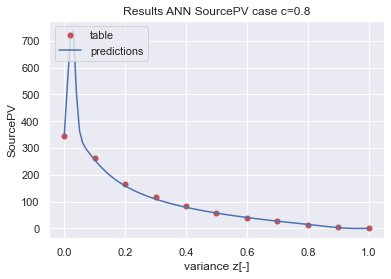

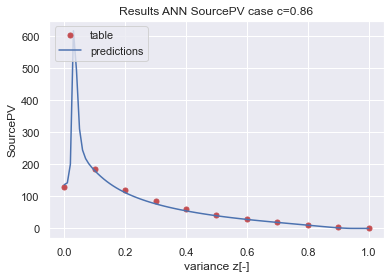

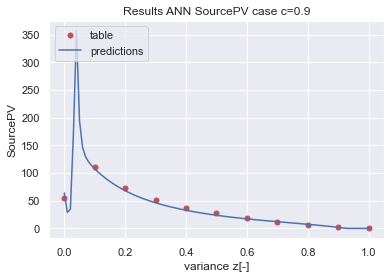

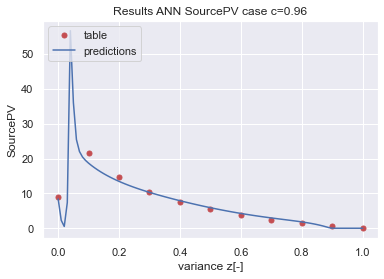

In [8]:
c_2=[0.8,0.86,0.9,0.96]
plot_case_2(c_2,0.01,'SourcePV','6D')

In [9]:
# function created in order to plot case 3: fluctuations in scaled progress variable at stoichiometric mixture
# output vs variance of scaled progress variable for different values of scaled progress variable at stoichiometric mixture fraction
# c_3= scaled progress variable, different values of the scaled progress variable. Typically high values of the scaled progress value
# z_var=array of different values of variance of scaled progress variable, output= dependent variable , for instance 'Temperature', unit=unit of measurement for instance "[K]"
# h=step of variance of scaled progress variable, for instance h=0.01 implies that values of the variance of the scaled progress variable from 0,0.01,0.02,....,0.99,1 will be plotted
# case= lookup table dimensionality, for instance "6D"
# example: plot_case_3([0.8,0.86,0.9,0.96],0.01,'SourcePV','[-]','6D')

def plot_case_3(c_3,h,output,table):
    z_sto=0.04 #stoichiometric mixture fraction
    c_var=np.linspace(0,1,int(1/h)+1) # array with different values of the variance of the mixture fraction
    output=str(output) # double check that output will be a string
    # search minimum and maximum value of the output stored in file 'Information_ANN_Architectures_'+case+'.csv'
    with open('Information_ANN_Architectures_'+table+'.csv', 'r', newline='\n') as read_obj:
        lines=reader(read_obj)
        for line in lines:
            if (line[0]==output):
                a=float(line[1]) # minimum value
                b=float(line[2]) # maximum value
    # load ANN model corresponding to output that will be plotted
    model=load_model('best_model_'+output+'_'+table+'.h5')
    # predictions using the ANN model the output for different values of variance of the scaled progress variable, considering no fluctuations in mixture fraction
    for c in c_3:
        z=[]  #create list for prediction values
        for i in range(0,len(c_var)):
            z1=model.predict(np.array([0,0,z_sto,c,c_var[i],0]).reshape(1,-1))[0][0] #ANN predicting values
            z.append((b-a)*z1+a)  #scaled back the ANN values, ANN predicts values between 0 to 1, they need to be rescaled using min and max values
        # search values stored in lookup tables
        PV=[] # empty array to store value that will be searched on the lookup table
        c_var_plt=np.linspace(0,1,11) # 11 values corresponding to the variance of the scaled progress variable stored in lookup table
        # uploading csv files containing dependend variables and the csv file which contains the output variable that will be plotted
        x1=pd.read_csv('Data/tables_'+table+'/inputs csv/inputs.csv',header=None).values # inputs file
        y1=pd.read_csv('Data/tables_'+table+'/outputs csv/'+output+'_table.csv',header=None).values #output file
        j=0
        # loop to search output values stored in the lookup table and store them in the array PV
        for i in range(0,x1.shape[0]):
            if np.abs(x1[i][0]-0)<0.0005:
                if np.abs(x1[i][1]-0)<0.0005:
                    if np.abs(x1[i][2]-z_sto)<0.0005:
                        if np.abs(x1[i][3]-c)<0.0005:
                            if np.abs(x1[i][4]-0)<0.0005:
                                if np.abs(x1[i][5]-c_var_plt[j])<0.0005:
                                    PV.append(y1[i][0])
                                    j=j+1
                                    j=min(j,10)
        #plotting results
        z=np.array(z)# converting list to an array
        #print(z) #check z converted to a array (optional)
        z=z.reshape(len(c_var),1) #converting to a column array
        #print(z) #check(optional)
        plt.plot(c_var_plt, PV, 'r.', markersize=10, label='table') # plotting stored in lookup table
        plt.plot(c_var, z,'b-',label='predictions')  #plotting predictions
        plt.title('Results ANN'+' '+output+' case c='+str(c)+', var z=0') #defining titles
        plt.xlabel('variance c[-]')             #defining x-axis variance scaled progress variable
        plt.ylabel(output)       #y-axis output
        plt.legend(loc='upper left')   #adding a legend
        plt.show()                      #show plot

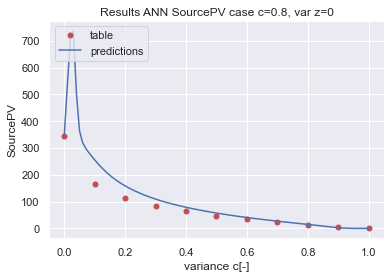

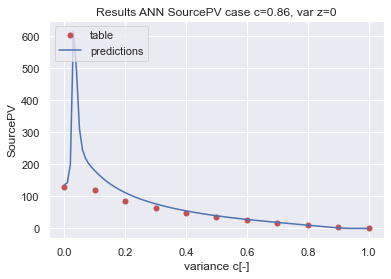

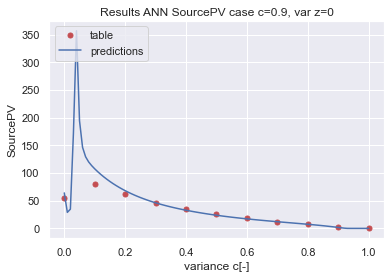

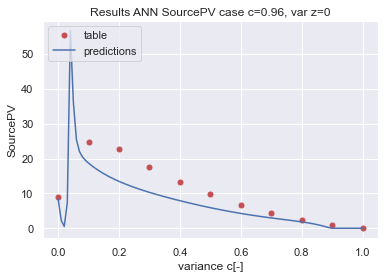

In [10]:
c_3=[0.8,0.86,0.9,0.96]
plot_case_3(c_3,0.01,'SourcePV','6D')

In [11]:
# function created in order to plot case 4: diluted and non adiabatic flamelets without fluctuation in mixture fraction and progress variable
# output vs enthalpy loss factor for different values of scaled progress variable at stoichiometric mixture fraction
# c_3= scaled progress variable, different values of the scaled progress variable. Typically high values of the scaled progress value
# z_plt=array of different values of enthalpy loss factor, output= dependent variable , for instance 'Temperature', unit=unit of measurement for instance "[K]"
# h=step of variance of scaled progress variable, for instance h=0.01 implies that values of the variance of the scaled progress variable from 0,0.01,0.02,....,0.99,1 will be plotted
# case= lookup table dimensionality, for instance "6D"
# example: plot_case_4([0.8,0.86,0.9,0.96],0.01,'SourcePV','[-]','6D')

def plot_case_4(c_3,h,output,table):
    z_sto=0.04 # stoichiometric mixture fraction
    gamma=0.6 # diluted level
    eta=np.linspace(0,1,int(1/h)+1) # array with different values of enthalpy loss factor
    output=str(output) # checking that output is a string
    # search minimum and maximum value of the output stored in file 'Information_ANN_Architectures_'+case+'.csv'
    with open('Information_ANN_Architectures_'+table+'.csv', 'r', newline='\n') as read_obj:
        lines=reader(read_obj)
        for line in lines:
            if (line[0]==output):
                a=float(line[1]) # minimum value
                b=float(line[2]) # maximum value
    # load ANN model corresponding to output that will be plotted
    model=load_model('best_model_'+output+'_'+table+'.h5')
    # predictions using the ANN model the output for different values of enthalpy loss factor, considering no fluctuations in mixture fraction and progress variable
    for c in c_3:
        z=[]  #create list for prediction values
        for i in range(0,len(eta)):
            z1=model.predict(np.array([gamma,eta[i],z_sto,c,0,0]).reshape(1,-1))[0][0] # ANN predictions
            z.append((b-a)*z1+a) #scaled back the ANN values, ANN predicts values between 0 to 1, they need to be rescaled using min and max values
        # search values stored in lookup tables
        PV=[] # empty array to store value that will be searched on the lookup table
        eta_plt=[0,0.1503631,0.2789406,0.3904314,0.4895344,0.5826570,0.6719351,0.7560871,0.839812,0.8799658,0.9205468,0.9607006,1] # 13 values corresponding to enthalpy loss factor stored in lookup table
        # uploading csv files containing dependend variables and the csv file which contains the output variable that will be plotted
        x1=pd.read_csv('Data/tables_'+table+'/inputs csv/inputs.csv',header=None).values # input file
        y1=pd.read_csv('Data/tables_'+table+'/outputs csv/'+output+'_table.csv',header=None).values # output file
        j=0
        # loop to search output values stored in the lookup table and store them in the array PV
        for i in range(0,x1.shape[0]):
            if np.abs(x1[i][0]-gamma)<0.0005:
                if np.abs(x1[i][1]-eta_plt[j])<0.0005:
                    if np.abs(x1[i][2]-z_sto)<0.0005:
                        if np.abs(x1[i][3]-c)<0.0005:
                            if np.abs(x1[i][4]-0)<0.0005:
                                if np.abs(x1[i][5]-0)<0.0005:
                                    PV.append(y1[i][0])
                                    j=j+1
                                    j=min(j,12)
#         print(PV)
#         print(c_var_plt)
#         print(c)
        
        #plotting results
        z=np.array(z)# converting list to an array
        #print(z) #check z converted to a array (optional)
        z=z.reshape(len(eta),1) #converting to a column array
        #print(z) #check(optional)
        plt.plot(eta_plt, PV, 'r.', markersize=10, label='table') # plotting stored in lookup table
        plt.plot(eta, z,'b-',label='predictions')  #plotting ANN predictions
        plt.title('Results ANN'+' '+output+' case c='+str(c)+', var z=0 , var c=0') #defining titles
        plt.xlabel('$\eta$[-]')             #defining enthalpy loss factor
        plt.ylabel(output)       #y-axis output
        plt.legend(loc='upper left')   #adding a legend
        plt.show()                      #show plot

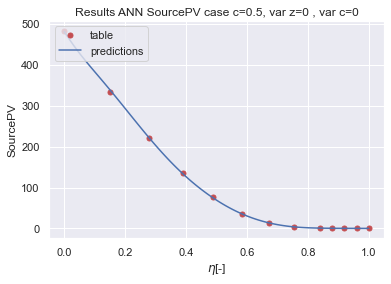

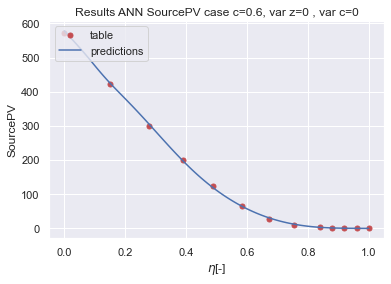

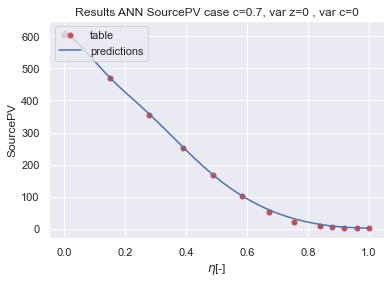

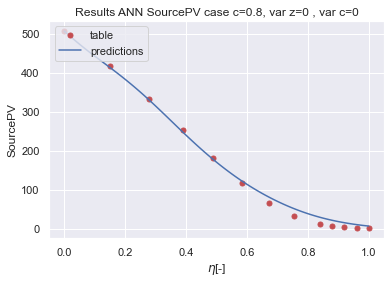

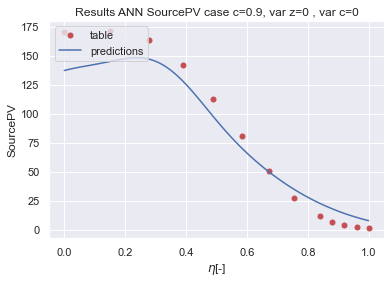

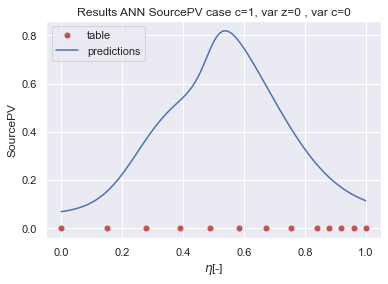

In [12]:
c_4=[0.5,0.6,0.7,0.8,0.9,1]
plot_case_4(c_4,0.01,'SourcePV','6D')